<a href="https://colab.research.google.com/github/PankajSanger/Sentiment-Analysis---Customer-Reviews-Livpure-/blob/main/Livpure_ratings_analysis_on_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Reviews data

In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('/content/Livpure_reviews_data.csv')

In [63]:
df.head()

,Reviews,Labels
0,Pros Effectively removes impurities from water...,1
1,Nice product. Feels like drinking fresh water ...,1
2,Purchased Glo Pro ++ purifier. Delivery is fas...,1
3,Good product for a small family but the instal...,1
4,Water quality is good after filtering and TDS ...,0


Dealing with missing values

In [64]:
df.isnull().sum()

Reviews    0
Labels     0
dtype: int64

In [65]:
df.shape

(300, 2)

In [66]:
df['Labels'].value_counts()

Labels
1    168
0    132
Name: count, dtype: int64

Text Preprocessing

Converting into lowercase

In [67]:
df['Reviews'] = df['Reviews'].str.lower()

In [68]:
df.head()

,Reviews,Labels
0,pros effectively removes impurities from water...,1
1,nice product. feels like drinking fresh water ...,1
2,purchased glo pro ++ purifier. delivery is fas...,1
3,good product for a small family but the instal...,1
4,water quality is good after filtering and tds ...,0


Removing puntuation using NLTK

In [69]:
import nltk
from nltk.tokenize import word_tokenize
import string

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
def remove_punctuation(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    cleaned_text = ' '.join(words)
    return cleaned_text


In [72]:
df['Cleaned_Reviews'] = df['Reviews'].apply(remove_punctuation)
df.head()

,Reviews,Labels,Cleaned_Reviews
0,pros effectively removes impurities from water...,1,pros effectively removes impurities from water...
1,nice product. feels like drinking fresh water ...,1,nice product feels like drinking fresh water a...
2,purchased glo pro ++ purifier. delivery is fas...,1,purchased glo pro purifier delivery is fast wi...
3,good product for a small family but the instal...,1,good product for a small family but the instal...
4,water quality is good after filtering and tds ...,0,water quality is good after filtering and tds ...


Removing extra spaces

In [73]:
import re

In [74]:
def normalize_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(normalize_text)

Chat word treatment

In [75]:
slang_dict = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "lol": "laughing out loud",
    "btw": "by the way",
    "omg": "oh my god",
    "idk": "I don't know",
    "gr8": "great",
    "thx": "thanks",
    "pls": "please",
    "wanna": "want to",
    "gonna": "going to",
    "gotta": "got to",
    "im": "I am",
    "ive": "I have",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "aint": "is not",
    "ya": "you",
    "cuz": "because",
    "tbh": "to be honest",
    "np": "no problem",
    "lmk": "let me know",
    "rn": "right now",
    "fam": "family",
    "lit": "exciting",
    "rofl": "rolling on the floor laughing"
}
def expand_slang(text, slang_dict):
    words = text.split()
    expanded_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(expanded_words)

In [76]:
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(lambda x: expand_slang(x, slang_dict))

In [77]:
df.head()

,Reviews,Labels,Cleaned_Reviews
0,pros effectively removes impurities from water...,1,pros effectively removes impurities from water...
1,nice product. feels like drinking fresh water ...,1,nice product feels like drinking fresh water a...
2,purchased glo pro ++ purifier. delivery is fas...,1,purchased glo pro purifier delivery is fast wi...
3,good product for a small family but the instal...,1,good product for a small family but the instal...
4,water quality is good after filtering and tds ...,0,water quality is good after filtering and tds ...


Spelling correction

In [78]:
from textblob import TextBlob

In [79]:
def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text

df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(correct_spelling)

In [80]:
df.head(15)

,Reviews,Labels,Cleaned_Reviews
0,pros effectively removes impurities from water...,1,pro effectively removed immunities from water ...
1,nice product. feels like drinking fresh water ...,1,nice product feels like drinking fresh water a...
2,purchased glo pro ++ purifier. delivery is fas...,1,purchased go pro purified delivery is fast wit...
3,good product for a small family but the instal...,1,good product for a small family but the instal...
4,water quality is good after filtering and tds ...,0,water quality is good after faltering and tis ...
5,installation was smooth. water does not taste ...,0,installation was smooth water does not taste t...
6,superb product in 10k price range.thank you,1,superb product in ask price you
7,"after buying the product, sales rep will say m...",0,after buying the product sales rep will say ma...
8,pre filter not available with pack. they didn'...,0,pre filter not available with pack they did th...
9,"but water tap in annoying, didn't like it.",0,but water tap in annoying did like it


Removing Stop words

In [81]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(remove_stopwords)

Lemmatization

In [83]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text


In [84]:
df['Cleaned_Reviews'] = df['Cleaned_Reviews'].apply(lemmatize_text)

In [85]:
df.head(15)

,Reviews,Labels,Cleaned_Reviews
0,pros effectively removes impurities from water...,1,pro effectively remove immunity water provide ...
1,nice product. feels like drinking fresh water ...,1,nice product feel like drink fresh water long ...
2,purchased glo pro ++ purifier. delivery is fas...,1,purchase go pro purified delivery fast amazon ...
3,good product for a small family but the instal...,1,good product small family installation experie...
4,water quality is good after filtering and tds ...,0,water quality good faltering tis also low prod...
5,installation was smooth. water does not taste ...,0,installation smooth water taste good
6,superb product in 10k price range.thank you,1,superb product ask price
7,"after buying the product, sales rep will say m...",0,buy product sale rep say main external filter ...
8,pre filter not available with pack. they didn'...,0,pre filter available pack think pre filter par...
9,"but water tap in annoying, didn't like it.",0,water tap annoying like


Tokenization

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
texts = df['Cleaned_Reviews'].values
tokenizer = Tokenizer(num_words=1500)

In [87]:
tokenizer.fit_on_texts(texts)

In [88]:
sequences = tokenizer.texts_to_sequences(texts)

In [89]:
print(sequences)

[[353, 524, 354, 770, 1, 71, 87, 231, 208, 72, 355, 419, 525, 1, 420, 97, 421, 21, 771, 356, 5, 104, 185, 10, 7, 1, 304, 6, 30, 98, 422, 186, 62, 254, 209, 305, 16, 62, 9, 24, 104, 3, 1, 7, 71, 87, 231, 208, 1, 255, 423, 122, 6, 424, 39, 1, 7, 306, 772, 72, 357, 97, 9, 24, 104, 3, 232, 256, 255, 773, 187, 40, 423, 6, 122], [49, 2, 150, 26, 151, 774, 1, 113, 16], [25, 24, 353, 88, 55, 138, 63, 775, 14, 114, 233, 50, 39, 526, 210, 89, 36, 166, 211, 99, 48, 37, 1, 28, 138, 87, 304, 30, 25, 123, 6, 307, 358, 527, 188, 4, 64, 425, 210, 426, 776, 41, 189, 427, 3, 11, 152, 51, 257, 35, 30, 100, 777, 105, 25, 9], [3, 2, 210, 90, 5, 73, 258], [1, 22, 3, 428, 12, 18, 91, 2, 22, 167, 23, 528, 308, 22, 4, 40, 529, 359, 89, 18, 91, 360], [5, 259, 1, 10, 3], [309, 2, 52, 53], [8, 2, 92, 778, 31, 361, 123, 6, 186, 53, 1, 7, 190, 138, 8, 123, 1, 6, 234, 9, 779, 260], [106, 6, 212, 427, 124, 106, 6, 42, 72, 115], [1, 37, 780, 26], [8, 9, 1, 7, 530, 17, 261, 53, 6, 213, 153, 531, 6, 310, 26, 262, 532, 7

In [90]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sequence_length = 70
data = pad_sequences(sequences, maxlen=max_sequence_length)

print(data.shape)


(300, 70)


Splitting data

In [91]:
from sklearn.model_selection import train_test_split

labels = df['Labels'].values
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.01, random_state=2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(297, 70) (3, 70) (297,) (3,)


Building LSTM

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim=1500, output_dim=16, input_length=max_sequence_length))
model.add(LSTM(units=64, dropout=0.25, recurrent_dropout=0.25, kernel_regularizer=l2(0.01)))
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 70, 16)            24000     
                                                                 
 lstm_7 (LSTM)               (None, 64)                20736     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44801 (175.00 KB)
Trainable params: 44801 (175.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
history = model.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
8/8 [==============================] - 10s 340ms/step - loss: 0.9948 - accuracy: 0.5443 - val_loss: 0.9642 - val_accuracy: 0.5667
Epoch 2/25
8/8 [==============================] - 2s 228ms/step - loss: 0.9448 - accuracy: 0.5612 - val_loss: 0.9177 - val_accuracy: 0.5667
Epoch 3/25
8/8 [==============================] - 1s 118ms/step - loss: 0.9004 - accuracy: 0.5612 - val_loss: 0.8775 - val_accuracy: 0.5667
Epoch 4/25
8/8 [==============================] - 1s 114ms/step - loss: 0.8614 - accuracy: 0.5612 - val_loss: 0.8424 - val_accuracy: 0.5667
Epoch 5/25
8/8 [==============================] - 1s 139ms/step - loss: 0.8247 - accuracy: 0.5612 - val_loss: 0.8082 - val_accuracy: 0.5667
Epoch 6/25
8/8 [==============================] - 1s 141ms/step - loss: 0.7959 - accuracy: 0.5612 - val_loss: 0.7702 - val_accuracy: 0.5667
Epoch 7/25
8/8 [==============================] - 1s 122ms/step - loss: 0.7472 - accuracy: 0.6456 - val_loss: 0.7606 - val_accuracy: 0.6500
Epoch 8/25
8/8 [===

Plotting Accuracy and Loss curves

In [95]:
import matplotlib.pyplot as plt

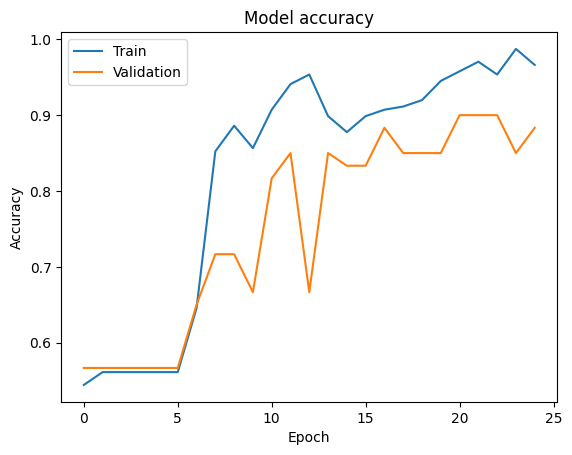

In [96]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

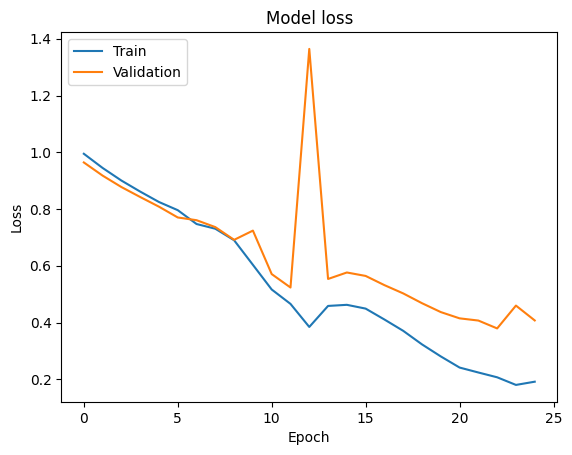

In [97]:
# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()